# Algorisme genètic canònic.

En aquesta pràctica implementarem l'algorisme genètic canònic per tal de solucionar el mateix problema que a la pràctica 2: trobar els coeficients d'una recta per tal de trobar la recta que millor ajusta una sèrie de punts observats. 

Després de generar les dades, definirem una sèrie de funcions que serviran per implementar parts de l'algorisme. Això ens permetrà comprovar que aquestes diferents parts funcionen correctament. Amb petites modificacions posteriors, finalment les unificarem en la  implementació de l'algorisme complet.

**Important:**
- Etiqueteu els eixos dels gràfics.
- Si utilitzeu nombres aleatoris, recordeu començar el generador en un punt concret determinat per la llavor.
- Comenteu el codi.

**Entrega:**

Abans d'entregar el notebook, recordeu reiniciar el kernel i reexecutar-ho tot. 

Guardeu el notebook clicant `File > Download as > iPython Notebook`.

Anomeneu el fitxer ''`practicalN_surname1_surname2.ipynb`'', on `N` is el número de la pràctica, i `surname1`, `surname2` els primers cognoms dels dos components de la parella.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from IPython import display

**P1.** Igual que a la pràctica 2, creeu les observacions a partir d'una recta amb una mica de soroll:

Recordeu l'equació de la recta $y=a x + b$. 

1. Definiu els coeficients inicials ($a_0$, $b_0$) escollint valors dins de l'interval [-5,5] ($a_0 \in [-5,5]$, $b_0 \in [-5,5]$).
2. Genereu 10 punts distribuïts equidistantment entre 1 i 10 i guardeu-los a la variable $x$. A cada punt assigneu el valor que defineix la recta. 
3. Afegiu soroll gaussià a cada punt (mitja 0, desviació estàndard 1). Aquestes seran les vostres observacions ($y_{obs}$ en la fórmula del MSE a sota) 
4. Visualitzeu les observacions juntament amb la recta inicial.

Text(0.5, 1.0, 'Recta inicial vs punts soroll')

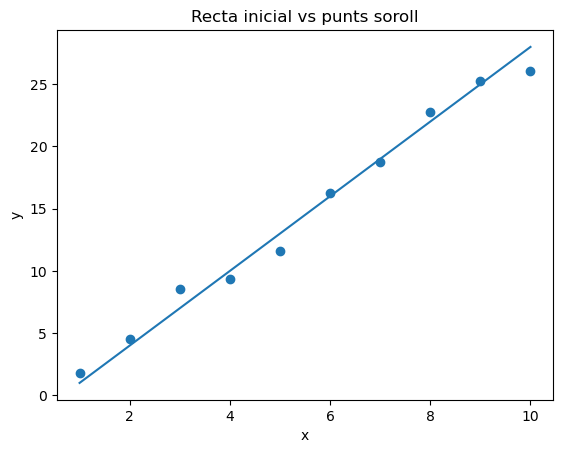

In [2]:
a0 = 3
b0 = -2

x = np.arange(1,11)
y=a0*x+b0
ysoroll = y + np.random.normal(loc=0, scale=1, size=(10))

#representació gràfica: 
plt.plot(x,y)
plt.scatter(x,ysoroll)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta inicial vs punts soroll')


**P2.** Recupereu la classe individual2 de la pràctica 3 i poseu-li per nom "individual". 

**P2.1** Modifiqueu la classe individual per tal d'afegir-hi l'atribut fitness. Modifiqueu la funció d'inicialització per tal que la fitness també pugui ser especificada al crear una instància i, si no, prengui el valor 0.

**P2.2.** Definiu la funció *assign_fitness*, que agafi com a argument un individu de la classe individual i assigni la fitness corresponent (1/MSE) a l'atribut *fitness*. 

Recordeu la fórmula del MSE:

$E=\frac{1}{n}\Sigma_{i=0}^{n-1}(y_{i,obs}-y_{i,pred})^2$


**P2.3.** Comproveu que tot funciona com espereu. 

In [3]:
class individual:
   
    def __init__ (self, n=1, bslow = [0,0], bhigh = [1,1], g= [], fitness = 0):
       
        #definim els atributs
        self.ngenes = n
        
        self.fitness = fitness
       
        #rang del genotip
        self.boundslow = bslow
        self.boundhigh = bhigh
       
        if len(g) == 0:
           
            #si el genotip no esta definit, agafem un valor random continu entre el rang definit
            self.genotype = np.random.uniform(low=self.boundslow, high=self.boundhigh, size=self.ngenes)
           
        else:
            self.genotype = np.array(g) #en el cas que el genotype estigués definit
           
    #funció en cas que el genotip no estigui definit, tindrà un valor continu en el rang definit (boundslow i boundhigh)
    def set_random_genotype (self):
        self.genotype = np.random.uniform(low=self.boundslow, high=self.boundhigh, size = self.ngenes)
    



In [4]:

 #funcio fitness
    
def assign_fitness (x,y,individu): #a la funcio li entrem un objecte de la clase individu
        
    a = individu.genotype[0] # a correspon al primer valor del genotip de lindividu 
    b = individu.genotype [1] # b correpon al segon valor del gentoip de lindividu 
    x = np.arange(1,11) 
        
    y = a*x + b
    MSE = np.mean(np.square(y - ysoroll)) #calcul del mean-square 
       
    fitness = 1.0/MSE #calcul de la fitness
    return fitness



In [5]:
#Comprovem si funciona 

individu = individual(g=[1,4]) #creem una instancia amb un genotip 
fitness = assign_fitness(x,y,individu) #cridem la funcio fitness i li entrem el genotype de l'individu creat 
print(fitness) 

0.018700734421647717


**P3**. Mutació. 

3.1 A continuació, definiu una funció de mutació *mutate* que apliqui una mutació gaussiana: per cada gen del genotip d'un individu, amb probabilitat *p_mut* el valor pot ser modificat afegint un nombre aleatori extret d'una distribució normal centrada en 0 i amb desviació estàndard $\sigma$. 

La funció ha de prendre 3 arguments: un individu de la classe individual, i els paràmetres *p_mut* i *sigma*. 

3.2.0 Comproveu que la funció es comporta de manera esperada: Definiu un genotip de longitud 2 [a,b], amb $a \ne b$ (trieu vosaltres un valor per $a$ i un altre per $b$). 

3.2.1 Genereu 1000 individus amb el genotip definit en el punt 3.2.0  i apliqueu la funció de mutació a cadascun d'ells. En la població resultant, compteu quantes vegades ha mutat cada gen. Quadra segons el valor de p_mut que heu donat? Repetiu per 3 valors de p_mut (0.05,0.1,0.5). Feu un scatterplot dels 1000 nou genotips en el pla $a$, $b$. Té sentit el que veieu?

3.2.2 Repetiu el punt 3.2.1 per 3 valors de sigma (0.1,0.2,0.3) i els 3 valors de p_mut. Quadra el que veieu amb el que esperarieu?

In [6]:
def mutate(individu, p_mut, sigma):

    for i in range(individu.ngenes):
        if np.random.rand() < p_mut: # es decideix si es fa la mutació o no, np.random.rand() genera un valor aleatori entre 0 i 1 
            mutacio = np.random.normal(loc=0, scale=sigma) # es genera el valor aleatori de mutació a partir d'una distribució normal
            individu.genotype[i] = individu.genotype[i] + mutacio # es modifica el valor original amb el valor de mutació generat
    
    return individu

In [7]:
# Comprovació de la funicó mutate

individu1 = individual(n=2, g=[3, 2]) #creem un nou objecte 'individu1' amb un cert genotype
print("Genotipo inicial:", individu1.genotype) #printejem el genotype inicial

mutate(individu1, p_mut=0.7, sigma=1.0) #cridem la funció mutate i li assignem uns valors 
print("Genotipo después de mutación:", individu1.genotype) #mirem si el genotype s'ha actualitzat o segueix sent el mateix que abans 



Genotipo inicial: [3 2]
Genotipo después de mutación: [4 2]


479
478


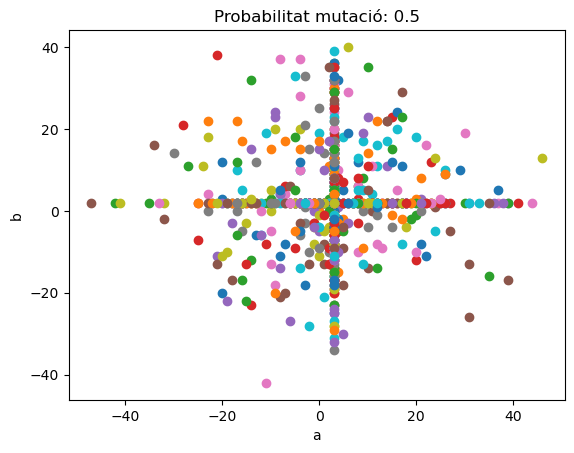

In [8]:
#Probabilitat de mutacio = 0.5


#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.5, sigma=15) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    #Representació gràfica: 
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.5')
plt.show()



96
96


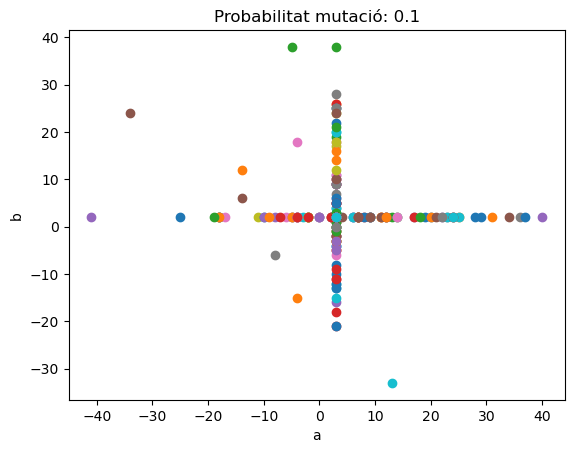

In [9]:
#Probabilitat de mutacio = 0.1

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.1, sigma=15) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.1')
plt.show()


43
55


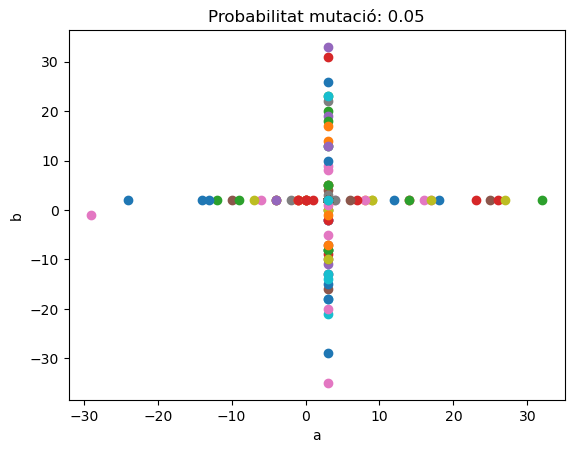

In [10]:
#Probabilitat de mutacio = 0.05

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.05, sigma=15) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.05')
plt.show()


 ***Quadra segons el valor de p_mut que heu donat?***
 
Si que quadra, ja que, com més alta és la probabilitat de mutació més canvis obtenim en els genomes respecte el inicial, en canvi a mesura que anem disminuint la probabilitat de mutació més baixos son els canvis de mutacions en el genotype. 
 Més mutacions quan p_mut = 0.5 i menys mutacions quan p_mut=0.05
 
 


***3.2.2 Repetiu el punt 3.2.1 per 3 valors de sigma (0.1,0.2,0.3) i els 3 valors de p_mut. Quadra el que veieu amb el que esperarieu?***

25
29


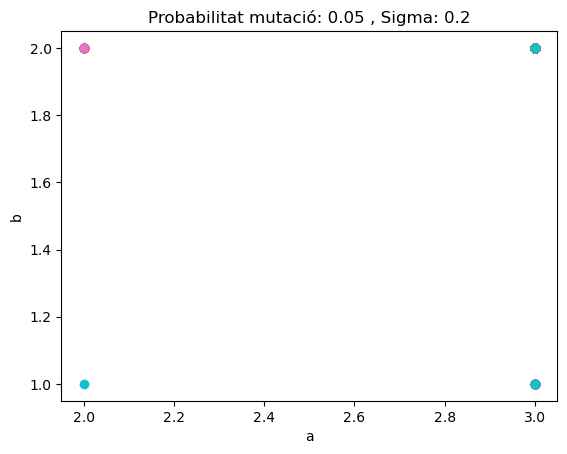

In [12]:

#SIGMA 0.2 , P_MUT=0.05


#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.05, sigma=0.2) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.05 , Sigma: 0.2')
plt.show()

53
52


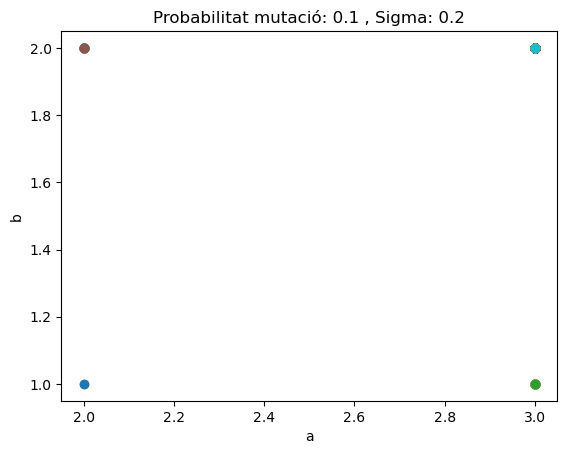

In [13]:
#SIGMA 0.2 , P_MUT=0.1

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.1, sigma=0.2) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.1 , Sigma: 0.2')
plt.show()

252
248


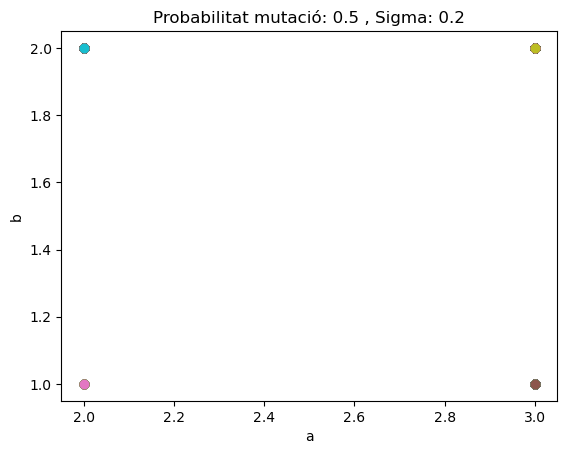

In [14]:
#SIGMA 0.2 , P_MUT=0.5

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.5, sigma=0.2) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.5 , Sigma: 0.2')
plt.show()

21
28


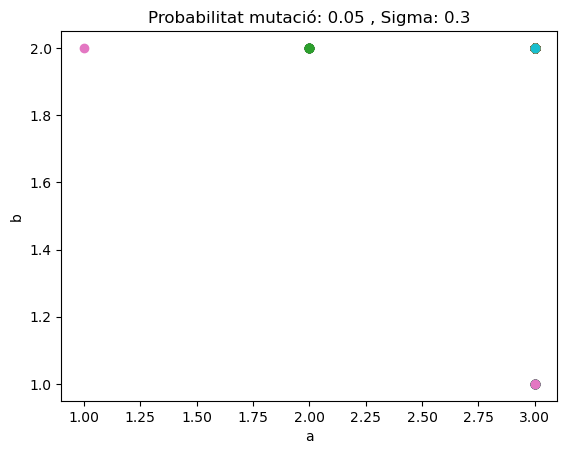

In [15]:
#SIGMA 0.3 , P_MUT=0.05

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.05, sigma=0.3) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.05 , Sigma: 0.3')
plt.show()

51
61


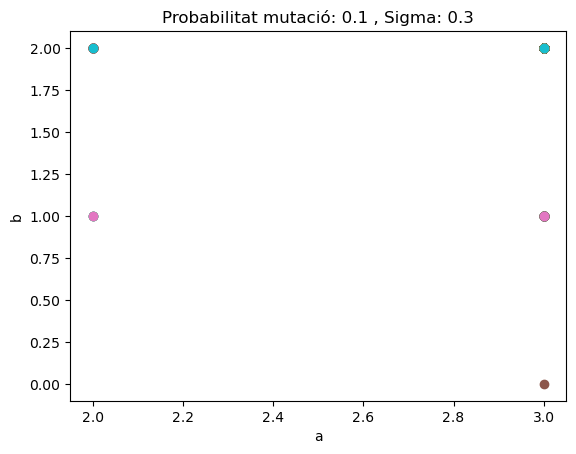

In [16]:
#SIGMA 0.3 , P_MUT=0.1

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.1, sigma=0.3) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.1 , Sigma: 0.3')
plt.show()

261
241


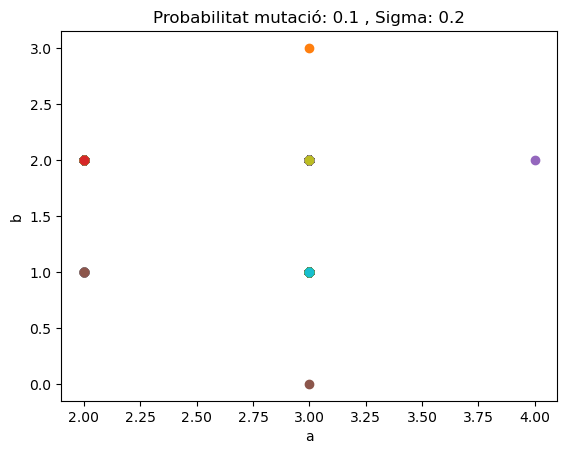

In [17]:
#SIGMA 0.3 , P_MUT=0.5

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.5, sigma=0.3) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.1 , Sigma: 0.2')
plt.show()

23
25


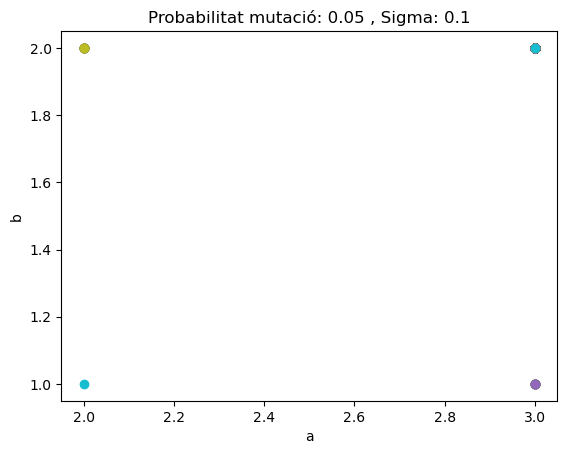

In [18]:
#SIGMA 0.1 , P_MUT=0.05

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.05, sigma=0.1) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.05 , Sigma: 0.1')
plt.show()

49
54


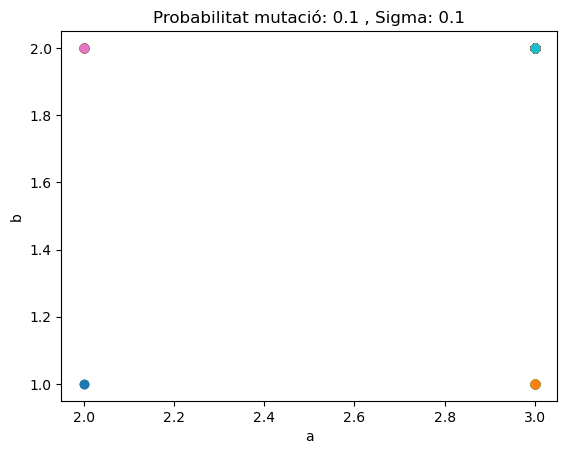

In [19]:
#SIGMA 0.1 , P_MUT=0.1

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.1, sigma=0.1) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.1 , Sigma: 0.1')
plt.show()

52
54


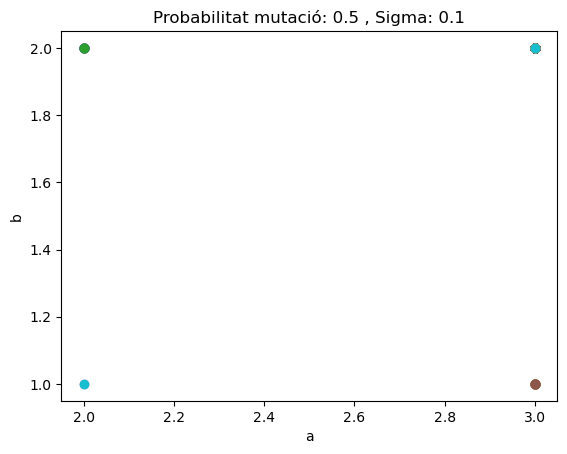

In [20]:
#SIGMA 0.1 , P_MUT=0.5

#contadors de gens mutats 
genA_mutat = 0
genB_mutat = 0 

poblacio = []  #llista buida

for i in range(1000):
    
    individu_x = individual (n=2, g=[3,2], bslow = [-100,-100], bhigh = [100,100] ) #definim el genotype 
    poblacio.append(individu_x) #afegim cada individu a la llista població 
    
    mutate(individu=individu_x, p_mut=0.1, sigma=0.1) #cridem la funcio mutate i l'apliquem en cada genotype (1000 individus)
    
    if individu_x.genotype[0] != 3: #comparem el primer gen, si ha canviat sumem un al contador genA_mutat
        genA_mutat = genA_mutat +  1
    
    if individu_x.genotype[1] != 2: #comparem el segon gen, si ha canviat sumem un al contador genB_mutat
        genB_mutat = genB_mutat +  1
    
    
    plt.scatter(individu_x.genotype[0],individu_x.genotype[1])

        

#mirem quans gens han mutat en cada posició 
print(genA_mutat)
print(genB_mutat)


plt.xlabel('a')
plt.ylabel ('b')
plt.title ('Probabilitat mutació: 0.5 , Sigma: 0.1')
plt.show()

El que veiem si que quadra amb el que esperariem, si comparem les diferents probabilitats de mutació amb els diferents valors de sigma veiem que en molts casos, com major és sigma més gran és el nombre de gens mutats. Això és degut a que com major és la desviació estàndard, es permeten mutacions més grans al genotip. Tot i així no ho veiem reflexat en tots els casos del nostre experiment, de totes maneres hem provat de posar un valor de sigma exageradament gran (1.5) i hem vist com el nombre de mutacions si que ha augmentat considerablement. 

**P4.** Selecció. 

P4.1. Implementeu una funció que donat un array de valors de fitness, no necessàriament en ordre, seleccioni una de les fitness segons "fitness-proportionate selection": 

Donades les fitness en ordre creixent $[f_0, f_1, \cdots, f_{n-1}]$, genereu un nombre aleatori $r \in [0, \sum_{j=0}^{n-1}f_{j}$] i escolliu l'index $k$ tal que:

$\sum_{j=0}^{k-1}f_j \le r < \sum_{j=0}^{k}f_j$

Exemple: Imagineu que teniu les fitness [15,10,20, 14]. En aquest cas, el valor cumulatiu de les fitness ordenades: [10, 24, 39, 59]. Imagineu que extraieu el valor r=28.5. La funció hauria de retornar en aquest cas la fitness amb índex 2 (39), ja que 28.5 està entre 24 i 39. 

Podeu primer codificar aquest cas concret, i després afegir que $r$ sigui un nombre aleatori dins del rang corresponent, generalitzar-ho per qualsevol array de fitness i convertir-ho en funció. Comproveu també que si el nombre extret fos 5, retornaria l'individu amb índex 0 en el cas de l'exemple.



In [21]:
#4.1

In [22]:

#funcio que et retorna la posicio i el que te millor fitness segon la suma acumulativa
def fitness_index(vector):
    n = len(vector)
    if n == 0:
        return None, None  #Si el vector està buit, retornar None
    
    vector_ordenat = np.sort(vector) #fem servir la funció sort de numpy per ordenar el vector
    
    #suma cumulativa 
    suma_acumulativa = np.cumsum(vector_ordenat) #funció cumsum de numpy que fa la suma cumulativa
    
    #valor de r
    r = np.random.uniform(0, suma_acumulativa[n-1]) 
    
    index = np.searchsorted(suma_acumulativa, r)
    
    return index, vector[index] 



In [23]:
#comprovem si funciona
vector =[12,33,44,55]

index = fitness_index(vector)

print (index)

(3, 55)


P4.2. Implementeu la funció *select* que prengui com a argument la llista d'individus corresponent a la població, i en retorni dos de diferents (seran els pares en la implementació de l'algorisme), segons el procés de *fitness proportionate selection* implementat a dalt.

Modifiqueu lleugerament el que heu implementat a la funció del punt 4.1: obteniu l'array de fitness dels individus, ordeneu les fitness, seleccioneu un individu, creeu un segon array d'individus i de fitness sense el que heu seleccionat ja, torneu a recalcular els ordres i seleccioneu un segon individu.

In [24]:
import random
import numpy as np

#funcio que ens retorna els dos pares seleccionats de tota la poblacio segons la seva fitness

def select(x, y, poblacio):
    pares = []
    fitness_array = []

    # Calculem la fitness per tots els individus de la poblacio
    for individu in poblacio:
        fitness = assign_fitness(x, y, individu) #calculem la fitness de cada individu
        individu.fitness = fitness #afegim latribut fitness en el individu
        fitness_array.append(fitness) #afegim totes les fitness en una llista buida

    if not fitness_array:
        return pares  

    # Seleccionem el pare 1
    index1, pare1_fitness = fitness_index(fitness_array)
    pare1 = poblacio[index1]
    pares.append(pare1)

    # Eliminem el pare 1 de la poblacio
    poblacio.pop(index1)
    fitness_array.pop(index1)

    if not fitness_array:
        return pares  

    # Seleccionem el pare 2
    index2, pare2_fitness = fitness_index(fitness_array)
    pare2 = poblacio[index2]
    pares.append(pare2)

    return pares 


In [25]:
#COMPROVEM QUE FUNCIONA LA FUNCIÓ SELECT

poblacio = []

#generem la població inicial: 
for i in range (10):
        
        g1 = random.randint(1,10) #nombre enter random entre 1 i 10 
        g2 = random.randint (1,10)
        
        individu = individual(n=2, g=[g1,g2])
        poblacio.append(individu)
        
pares = select(x,y,poblacio)

print (pares) #et retorna dos individus que son els pares que han sigut seleccionats 

[<__main__.individual object at 0x7fcce16f5fd0>, <__main__.individual object at 0x7fcce16f5ac0>]


**P5**. Crossover.

Implementeu la funció *mate* que prengui 3 arguments: 2 pares ( $p_1$, $p_2$ ) i $\eta$, i retorni dos fills ($f_1$, $f_2$). Els genotips dels fills es determinen segons el mètode de *simulated binary crossover*:
$$
f_1=(1/2)[(1+\beta)p_1 + (1-\beta)p_2]\\
f_2=(1/2)[(1-\beta)p_1 + (1+\beta)p_2]
$$

on $\beta$ s'escull segons:
$$
\beta=\begin{cases}
(2u)^{\frac{1}{\eta+1}}, & \text{if } u \leq 0.5\\
\frac{1}{2(1-u)}^{\frac{1}{\eta+1}}, &\text{if } u > 0.5 \\
\end{cases}
$$
i $u$ és un nombre aleatori extret entre [0,1] i $\eta$ és el *crowding factor* o *distribution index*.

Per fer els fills, podeu primer fer una còpia dels pares i després aplicar el crossover.

Comproveu que la funció fa el que espereu: creeu dos individus amb dos genotips coneguts, i vegeu quins genotips tenen els fills que retorna la vostra funció *mate*. Comproveu que els genotips dels pares es mantenen intactes.


In [32]:
import random

def mate (p1,p2,fact):
   
    #fem una copia dels pares per crear els fills
    f1 = p1.copy()
    f2 = p2.copy()
   
    #escollim un valor aleatori entre 0 i 1
    u = random.uniform(0,1)
   
    #depenen del valor de u calculem beta
    if u <= 0.5:
        beta = (2*u)**(1/(fact+1))
       
    else:
        beta = (1/(2*(1-u)))** (1/(fact+1))
       
    #apliquem la crossover
   
    for i in range (len(p1)):
        f1[i] = (1/2)*(((1+beta)*p1[i])+((1-beta)*p2[i]))
        f2[i] = (1/2)*(((1-beta)*p1[i])+((1+beta)*p2[i]))
   
    return f1, f2

In [35]:
#comprovem la funcio mate

p1 = [2,3]
p2 = [4,5]
fact = 1

f1,f2 = mate(p1,p2,fact)


#comprovem que els genotips dels pares es queden intactes
print(p1)
print(p2)

#mirem els genotips dels fills
print("Genotip del fill 1: " + str(f1))
print("Genotip del fill 2: " + str(f2))


[2, 3]
[4, 5]
Genotip del fill 1: [1.9068390128111798, 2.90683901281118]
Genotip del fill 2: [4.09316098718882, 5.09316098718882]


Veiem com si imprimim, els genotips dels pares es mantenen intactes ([2,3], [4,5]). Els fills tenen genotips diferents als dels pares, fet que indica que han mutat. 

**P6**. Algorisme genètic.

Finalment, definiu una funció que executi l'algorisme genètic canònic fent servir la classe individual per definir els individus i les funcions *assign_fitness*, *select*, *mate*, *mutate*.

La funció ha de prendre com a arguments amb paraules clau tots els arguments que necessiten les vostres funcions, més el que sigui necessari per especificar la població d'individus i el bon funcionament de l'algorisme.

Feu que el millor individu de cada generació sempre passi a la següent. 

Feu que la probabilitat de crossover entre dos pares sigui p_crossover, i que la mutació de cada fill després del crossover s'executi només amb probabilitiat p_mut_ind.

Feu que al final de l'execució pugueu fer un gràfic de la fitness mitjana i màxima a cada iteració.

Executeu l'algorisme per diferents seeds. Feu gràfics dels resultats obtinguts (la recta que correspon a la $a$ i $b$ trobada juntament amb les observacions)  i comenteu-los breument.


In [28]:

#funcio que ens ordena els individus de millor a pitjor fitness per treure els dos pitjors fills i substituir-los per els pares 
def ordre(poblacio):
    return list(sorted(poblacio, key=lambda atr: atr.fitness))


In [29]:
import random 


def algorisme_genetic(poblacio,x,y, p_mut, sigma, fact):
    
    for i in range (100): #numero de generacions  
        poblacio_fills = []
        #bucle on creem la poblacio de fills mutats a partir dels dos pares seleccionats 
        for i in range (50): 
            
            pares = select(x,y,poblacio)


            #genotip dels pares seleccionats
            pare1_genotip = pares[0].genotype
            pare2_genotip = pares[1].genotype

            #creem els fills amb la funció mate 
            f1,f2 = mate(pare1_genotip,pare2_genotip,fact)


            #mutem els fills: 
            fill1 = individual(n=2, g=f1)
            fill2 = individual(n=2, g=f2)


            f1_mutat = mutate(fill1, p_mut, sigma)
            f2_mutat = mutate(fill2, p_mut, sigma)

            #afegim els fills a la llista buida (nova poblacio dels fills)
            poblacio_fills.append(f1_mutat)
            poblacio_fills.append(f2_mutat)

            #mirem la fitness dels fills: 
            fitness_f1_mutat = assign_fitness(x,y,f1_mutat)
            fitness_f2_mutat = assign_fitness(x,y,f2_mutat)


        #ordenem la nova poblacio de fills per la seva fitness 
        fills_ordre = ordre(poblacio_fills)

        #eliminem els dos ultims fills amb menor fitness i els substituim per els pares seleccionats
        fills_que_passen = fills_ordre[:-2]
        fills_que_passen.extend(pares)
        
        poblacio = fills_que_passen
       
    
   
    #millor individus de la ultima generacio 
    best_individus = select(x,y,poblacio)
    
    #genotip del individu seleccionat
    individu_genotype = best_individus[0].genotype

        
    return individu_genotype


In [30]:
import random

poblacio = []
p_mut = 1.5
sigma = 45
fact = 0.5

for i in range (1000):
        
    g1 = random.randint(1,10)
    g2 = random.randint (1,10)
        
    individu = individual(n=2, g=[g1,g2])
    poblacio.append(individu)
        
    

individu_genotype = algorisme_genetic(poblacio, x, y, p_mut, sigma, fact)
    
print (individu_genotype)


[17410612759 14761514574]


[17410612759 14761514574]


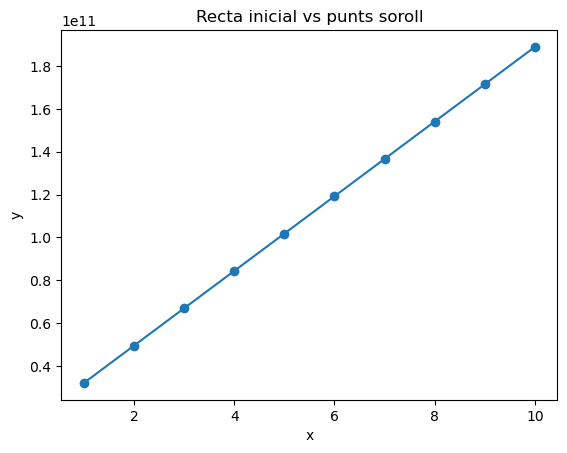

In [31]:

#mirem si ens dona el mateix que la recte inicial, a i b son els gens del genotype escollit millor
a = individu_genotype[0]
b = individu_genotype [1]


x = np.arange(1,11)
y = a*x + b


ysoroll = y + np.random.normal(loc=0, scale=1, size=(10))

#representació gràfica: 
plt.plot(x,y)
plt.scatter(x,ysoroll)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta inicial vs punts soroll')


print (individu_genotype)

Ens hem decantat per implementar l'algorisme genètic on es seleccionen dos pares i aquests dos tenenen dos fills, els quals muten. D'aquesta manera generem la variabilitat genètica en la descendència, fet que permet evolucionar. La nova generació de fills l'hem emmagatzemat en un vector anomenat "fills". Finalment, hem ordenat la fitness dels fills obtinguts de millor a pitjor i subsituit els dos fills que tenen la fitness més baixa pels pares. Finalment, un cop passades 100 generacions hem obtingut una població final i hem aplicat la funció "select" per aconseguir el millor individu i el seu genotip i poder fer la recta. 